# single-logic-qubit

In [2]:
import numpy as np
global sigma_x, sigma_y, sigma_z, identity
 # 定义泡利矩阵
sigma_x = np.array([[0, 1], [1, 0]], dtype=complex)
sigma_y = np.array([[0, -1j], [1j, 0]], dtype=complex)
sigma_z = np.array([[1, 0], [0, -1]], dtype=complex)
identity = np.array([[1, 0], [0, 1]], dtype=complex)

def apply_channel(rho_ab, KA):
    #rho_ab_new = np.zeros([4,4], dtype=complex)
    rho_ab_new = KA @ rho_ab @ np.conjugate(KA.T)
    return rho_ab_new 

def partial_trace(rho_ab):
    I = rho_ab[0:2, 0:2]
    J = rho_ab[0:2, 2:4]
    K = rho_ab[2:4, 0:2]
    L = rho_ab[2:4, 2:4]
    rho_a = np.array([[np.trace(I),np.trace(J)],[np.trace(K),np.trace(L)]])
    rho_b = I + L
    return rho_a, rho_b

def quantum_mutual_information(rho_ab, rho_a, rho_b):
    """
    计算两个量子系统之间的量子互信息。

    参数:
    rho_ab (numpy.ndarray): 两个系统的联合密度矩阵。
    rho_a (numpy.ndarray): 第一个系统的密度矩阵。
    rho_b (numpy.ndarray): 第二个系统的密度矩阵。
    """
    rho_ab_eig = np.linalg.eig(rho_ab)[0]
    rho_a_eig = np.linalg.eig(rho_a)[0]
    rho_b_eig = np.linalg.eig(rho_b)[0]
    S_ab,S_a,S_b = 0,0,0
    for i in range(len(rho_ab_eig)):
        if rho_ab_eig[i] != 0:
            S_ab -= rho_ab_eig[i] * np.log2(rho_ab_eig[i])
    for i in range(len(rho_a_eig)):
        if rho_a_eig[i] != 0:
            S_a -= rho_a_eig[i] * np.log2(rho_a_eig[i])
        if rho_b_eig[i] != 0:
            S_b -= rho_b_eig[i] * np.log2(rho_b_eig[i])
    I = S_a + S_b - S_ab
    return I

def quantum_EI(K):
    KA = np.kron(K, identity)
    state = np.array([1/np.sqrt(2), 0, 0, 1/np.sqrt(2)])
    rho_ab = np.outer(state, state)
    rho_ab_new = apply_channel(rho_ab, KA)
    print(rho_ab_new)
    rho_a_new, rho_b_new = partial_trace(rho_ab_new)
    print(rho_a_new,rho_b_new)
    EI = quantum_mutual_information(rho_ab_new, rho_a_new, rho_b_new)
    return EI

In [13]:
gamma = 0.1
K = (identity + gamma * sigma_x) / (1 + gamma)
K = sigma_x
quantum_EI(K)

[[0.5 0.  0.  0.5]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0. ]
 [0.5 0.  0.  0.5]]
[[0. +0.j 0. +0.j 0. +0.j 0. +0.j]
 [0. +0.j 0.5+0.j 0.5+0.j 0. +0.j]
 [0. +0.j 0.5+0.j 0.5+0.j 0. +0.j]
 [0. +0.j 0. +0.j 0. +0.j 0. +0.j]]
[[0.5+0.j 0. +0.j]
 [0. +0.j 0.5+0.j]] [[0.5+0.j 0. +0.j]
 [0. +0.j 0.5+0.j]]


(1.9999999999999987-3.950298132339051e-32j)

In [14]:
K @ np.conjugate(K.T)

array([[1.+0.j, 0.+0.j],
       [0.+0.j, 1.+0.j]])

In [15]:
bit1 = np.array([1, 0])
bit1_t1 = K @ bit1
bit1_t1

array([0.+0.j, 1.+0.j])

# five-qubit-code

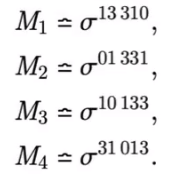

In [12]:
M1 = np.kron(np.kron(np.kron(np.kron(sigma_x, sigma_z), sigma_z), sigma_x), identity)
M2 = np.kron(np.kron(np.kron(np.kron(identity, sigma_x), sigma_z), sigma_z), sigma_x)
M3 = np.kron(np.kron(np.kron(np.kron(sigma_x, identity), sigma_x), sigma_z), sigma_z)
M4 = np.kron(np.kron(np.kron(np.kron(sigma_z, sigma_x), identity), sigma_x), sigma_z)

M1 @ M2 - M2 @ M1

array([[0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
       ...,
       [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j]])

In [16]:
bit2 = np.array([1, 0])
bit3 = np.array([1, 0])
bit4 = np.array([1, 0])
bit5 = np.array([1, 0])

bit1 = np.array([1, 0])
bits = np.kron(np.kron(np.kron(np.kron(bit1, bit2), bit3), bit4), bit5)
bits

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

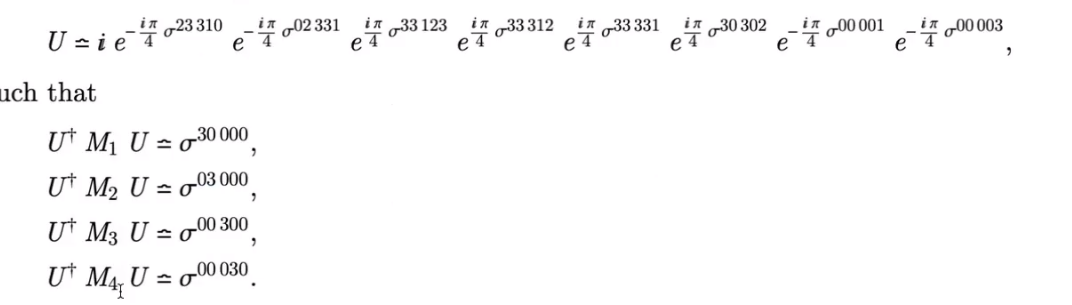

In [40]:
op1 = np.kron(np.kron(np.kron(np.kron(sigma_y, sigma_z), sigma_z), sigma_x), identity)
op2 = np.kron(np.kron(np.kron(np.kron(identity, sigma_y), sigma_z), sigma_z), sigma_x)
op3 = np.kron(np.kron(np.kron(np.kron(sigma_z, sigma_z), sigma_x), sigma_y), sigma_z)
op4 = np.kron(np.kron(np.kron(np.kron(sigma_z, sigma_z), sigma_z), sigma_x), sigma_y)
op5 = np.kron(np.kron(np.kron(np.kron(sigma_z, sigma_z), sigma_z), sigma_z), sigma_x)
op6 = np.kron(np.kron(np.kron(np.kron(sigma_z, identity), sigma_z), identity), sigma_y)
op7 = np.kron(np.kron(np.kron(np.kron(identity, identity), identity), identity), sigma_x)
op8 = np.kron(np.kron(np.kron(np.kron(identity, identity), identity), identity), sigma_z)

def mat_exp(op):
    U0, S, Vt = np.linalg.svd(op, full_matrices=False)
    return U0 @ np.diag(np.exp(1j * np.pi / 4 * S)) @ Vt


U = 1j* mat_exp(-op1) @ mat_exp(-op2) @ mat_exp(op3) @ mat_exp(op4) @ mat_exp(op5) @ mat_exp(op6) @ mat_exp(-op7) @ mat_exp(-op8)

U

array([[ 0.+0.00000000e+00j,  0.+0.00000000e+00j,  0.+0.00000000e+00j,
        ...,  0.+0.00000000e+00j,  0.+0.00000000e+00j,
        -1.+6.66133815e-16j],
       [ 0.+0.00000000e+00j,  0.+0.00000000e+00j,  0.+0.00000000e+00j,
        ...,  0.+0.00000000e+00j, -1.+6.66133815e-16j,
         0.+0.00000000e+00j],
       [ 0.+0.00000000e+00j,  0.+0.00000000e+00j,  0.+0.00000000e+00j,
        ...,  1.-6.66133815e-16j,  0.+0.00000000e+00j,
         0.+0.00000000e+00j],
       ...,
       [ 0.+0.00000000e+00j,  0.+0.00000000e+00j,  1.-6.66133815e-16j,
        ...,  0.+0.00000000e+00j,  0.+0.00000000e+00j,
         0.+0.00000000e+00j],
       [ 0.+0.00000000e+00j, -1.+6.66133815e-16j,  0.+0.00000000e+00j,
        ...,  0.+0.00000000e+00j,  0.+0.00000000e+00j,
         0.+0.00000000e+00j],
       [-1.+6.66133815e-16j,  0.+0.00000000e+00j,  0.+0.00000000e+00j,
        ...,  0.+0.00000000e+00j,  0.+0.00000000e+00j,
         0.+0.00000000e+00j]])

In [41]:
U @ np.conjugate(U.T)

array([[1.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 1.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 1.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
       ...,
       [0.+0.j, 0.+0.j, 0.+0.j, ..., 1.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 1.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 1.+0.j]])

In [42]:
A = np.conjugate(U.T) @ M1 @ U
A.diagonal()

array([0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
       0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
       0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
       0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j])

In [33]:
np.kron(np.kron(np.kron(np.kron(sigma_z, identity), identity), identity), identity).diagonal()

array([ 1.+0.j,  1.+0.j,  1.+0.j,  1.+0.j,  1.+0.j,  1.+0.j,  1.+0.j,
        1.+0.j,  1.+0.j,  1.+0.j,  1.+0.j,  1.+0.j,  1.+0.j,  1.+0.j,
        1.+0.j,  1.+0.j, -1.+0.j, -1.+0.j, -1.+0.j, -1.+0.j, -1.+0.j,
       -1.+0.j, -1.+0.j, -1.+0.j, -1.+0.j, -1.+0.j, -1.+0.j, -1.+0.j,
       -1.+0.j, -1.+0.j, -1.+0.j, -1.+0.j])